In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_curve, auc

In [2]:
df = pd.read_csv("diabetes.csv")

In [3]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

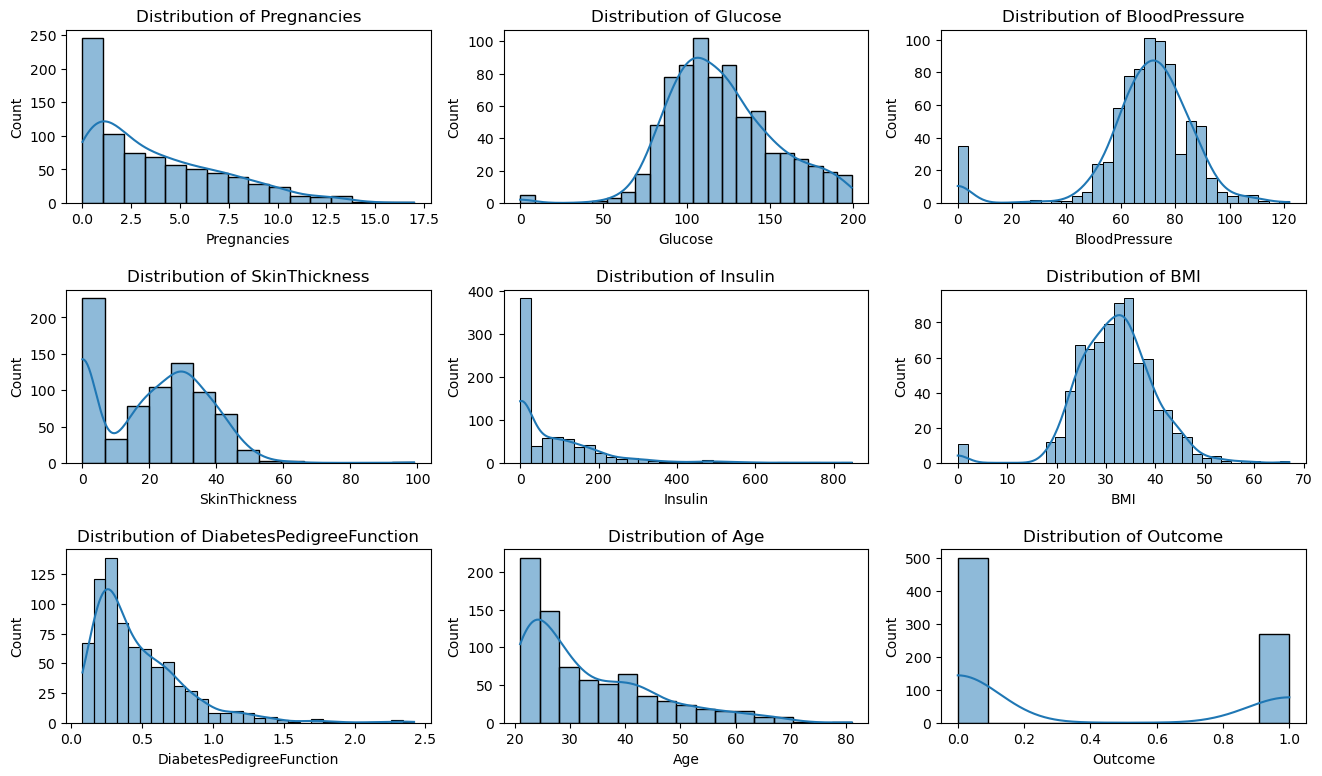

In [7]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(16, 9))
plt.subplots_adjust(hspace=0.5)

for ax, col in zip(axes.flat, df.columns):
    sns.histplot(data=df, x=col, ax=ax, kde=True)
    ax.set_title(f"Distribution of {col}")

plt.show()

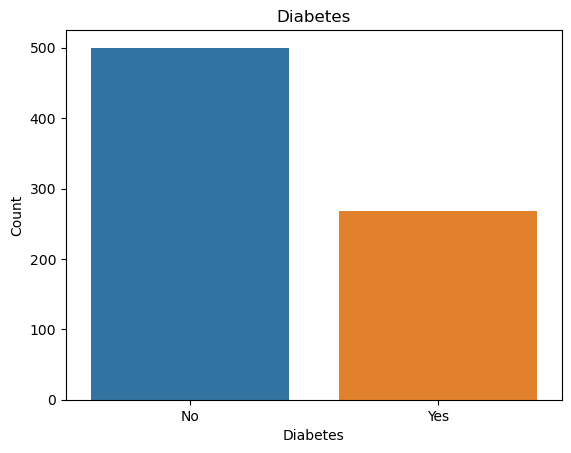

In [8]:
sns.countplot(data=df, x="Outcome")
plt.xlabel("Diabetes")
plt.xticks([0, 1], ['No', 'Yes'])
plt.ylabel("Count")
plt.title("Diabetes")
plt.show()

In [9]:
df_diabetes = df[df["Outcome"] == 1]
df_no_diabetes = df[df["Outcome"] == 0]

In [10]:
print(f"Diabetic people {round((len(df_diabetes)/len(df))*100, 2)} %")
print(f"Non-diabetic people {round((len(df_no_diabetes)/len(df))*100, 2)} %")

Diabetic people 34.9 %
Non-diabetic people 65.1 %


In [11]:
scaler = MinMaxScaler()

In [12]:
X = df.drop("Outcome", axis=1)
Y = df.Outcome

In [13]:
X = scaler.fit_transform(X)

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, shuffle=True, random_state=101)

In [15]:
smote = SMOTE(random_state=42)

In [16]:
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [17]:
model = LinearSVC()

In [18]:
model.fit(X_train_resampled, y_train_resampled)

LinearSVC()

In [19]:
model.score(X_test, y_test)

0.7662337662337663

In [20]:
y_pred = model.predict(X_test)

In [21]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.76      0.81       103
           1       0.62      0.78      0.69        51

    accuracy                           0.77       154
   macro avg       0.75      0.77      0.75       154
weighted avg       0.79      0.77      0.77       154



In [22]:
cm = confusion_matrix(y_test, y_pred)

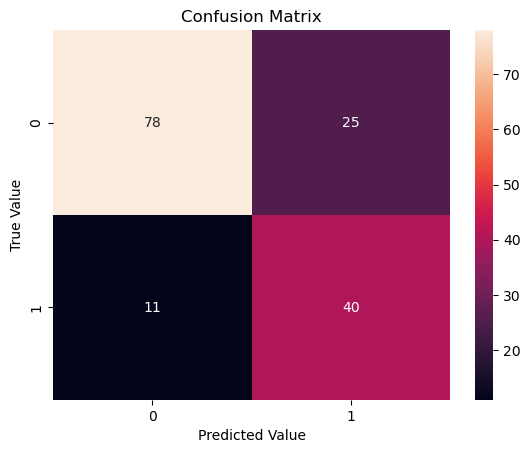

In [23]:
sns.heatmap(cm, annot=True, fmt="d")
plt.xlabel("Predicted Value")
plt.ylabel("True Value")
plt.title("Confusion Matrix")
plt.show()

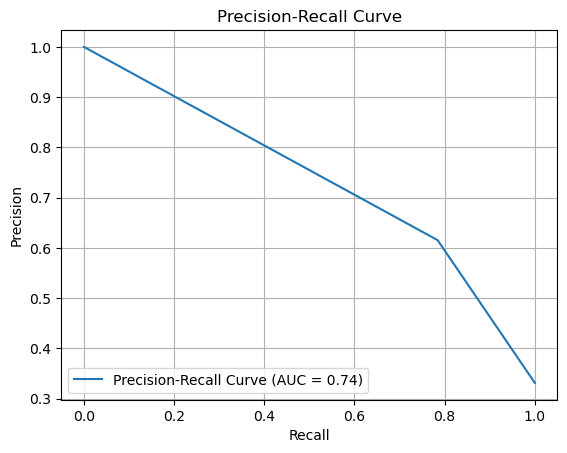

In [24]:
precision, recall, _ = precision_recall_curve(y_test, y_pred)
pr_auc = auc(recall, precision)
plt.plot(recall, precision, label="Precision-Recall Curve (AUC = {:.2f})".format(pr_auc))
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend(loc="lower left")
plt.grid(True)
plt.show()